In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set()
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Some Numerical Information about the Data

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [33]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

## Data Cleaning

In [3]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

## Data Visualization

In [4]:
# Define list of Continuous columns Names
continuous = ['radius_mean', 'perimeter_mean', 'perimeter_worst', 'concave points_mean', 'concave points_worst']

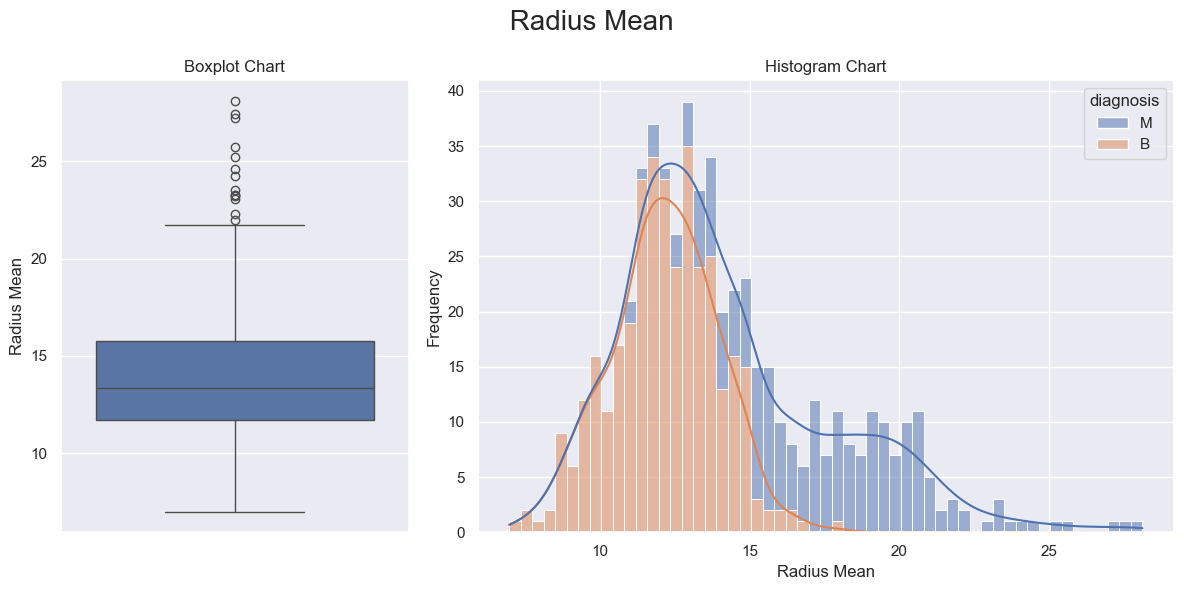

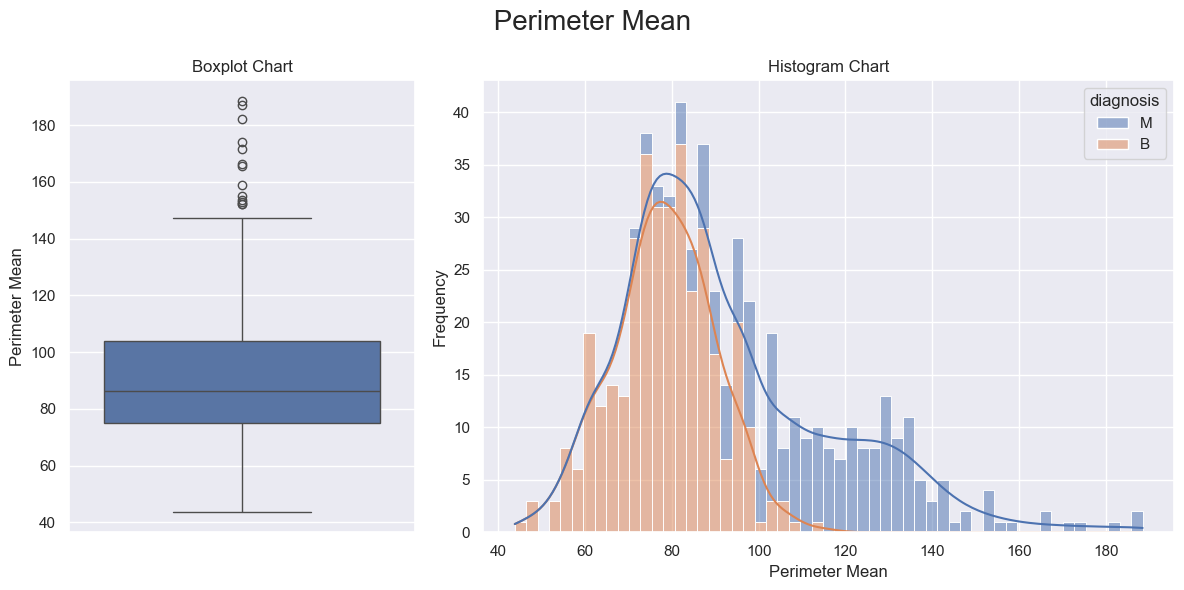

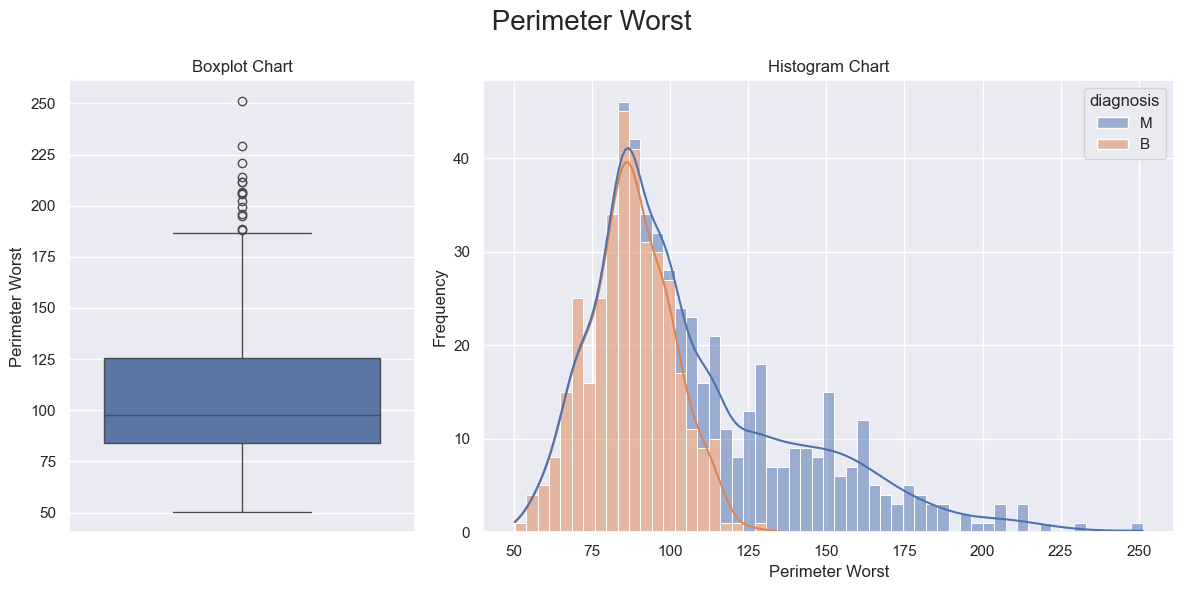

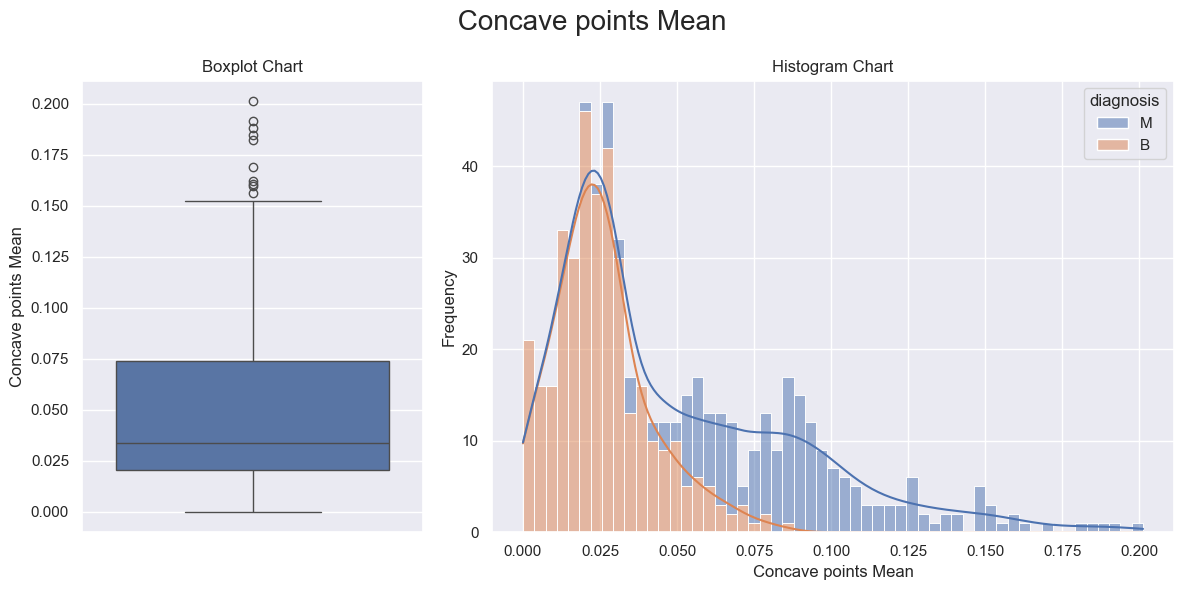

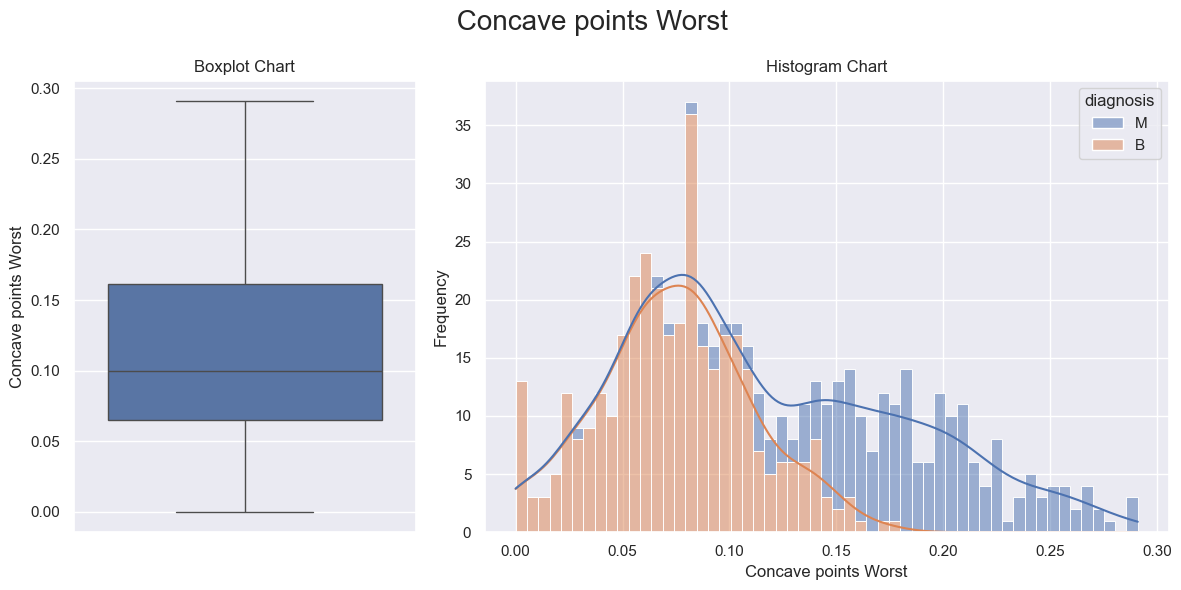

In [5]:
# Define a function to Capitalize the first element of string and remove '_' character
def title(name):
    return (' '.join(word.capitalize()for word in name.split('_')))


# Distribution of Categorical Features
def plot_continious_distribution(df, column, hue):

    width_ratios = [2, 4]
    gridspec_kw = {'width_ratios':width_ratios}
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw = gridspec_kw) 
    fig.suptitle(f' {title(column)} ', fontsize=20) 
    
    sns.boxplot(df[column], ax=ax[0])
    ax[0].set_title('Boxplot Chart')
    ax[0].set_ylabel(title(column))

    sns.histplot(x = df[column], kde=True, ax=ax[1], hue=df[hue], multiple = 'stack', bins=55)
    ax[1].set_title('Histogram Chart')
    ax[1].set_ylabel('Frequency')
    ax[1].set_xlabel(title(column))

    plt.tight_layout()    
    plt.show()
for conti in continuous :
    plot_continious_distribution(df, conti, 'diagnosis')    

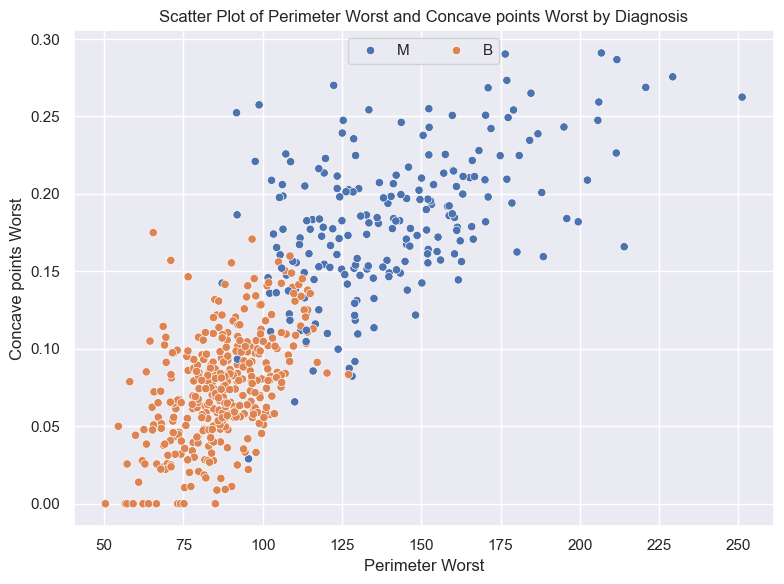

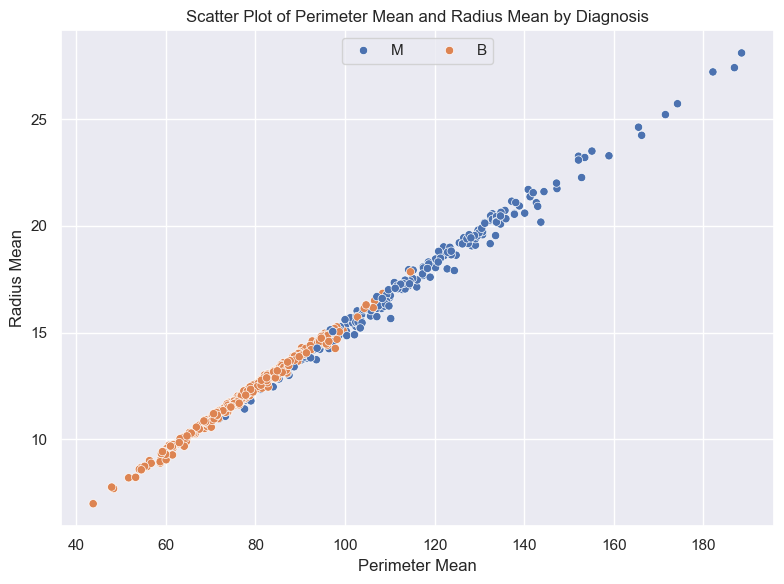

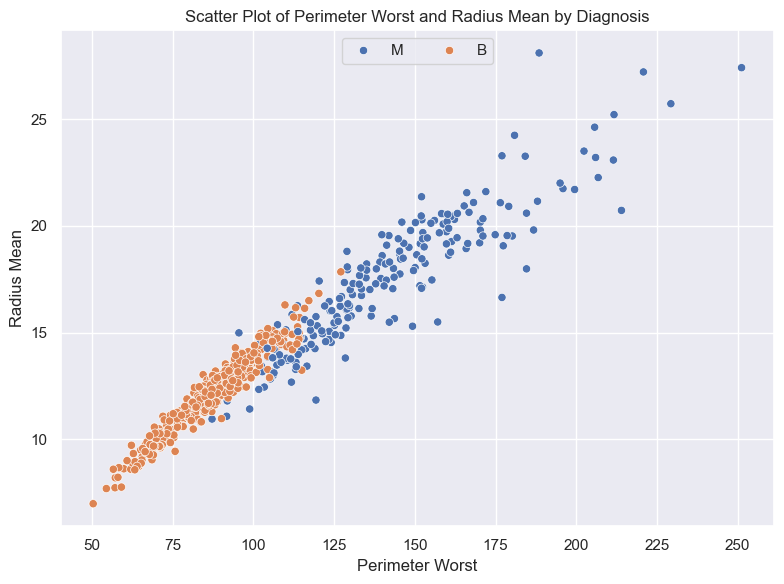

In [6]:
# Define a Function for Scatter Plot
def scatter_plot(data, x, y, hue):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=data, x=x, y=y, hue=hue)
    plt.title(f'Scatter Plot of {title(x)} and {title(y)} by {title(hue)}')
    plt.legend(title=None, ncol=2, loc='upper center')
    plt.xlabel(title(x))
    plt.ylabel(title(y))

    plt.tight_layout()
    plt.show()

scatter_plot(data=df, x="perimeter_worst", y="concave points_worst", hue="diagnosis")
scatter_plot(data=df, x="perimeter_mean", y="radius_mean", hue="diagnosis")
scatter_plot(data=df, x="perimeter_worst", y="radius_mean", hue="diagnosis")

## Data Preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Initialize StandardScaler
stc = StandardScaler()
# Initialize LabelEncoder
le = LabelEncoder()

# Apply Standard Scaler to the selected columns
stc_cols = []
for col in df.columns : 
    if col != 'diagnosis':
        stc_cols.append(col)
    else : 
        pass
df[stc_cols] = stc.fit_transform(df[stc_cols])
# Apply Label Encoder to the selected column
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [8]:
from sklearn.model_selection import train_test_split 

x = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']  # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
#Importing the Libraries
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [10]:
# List of Models to Try
models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('XGB Classifier', XGBClassifier())
]

# Train and evaluate each model
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training accuracy: {name}', model.score(x_train, y_train))
    print(f'Test accuracy: {name}', accuracy_score(y_test, y_pred))
    print()

Training accuracy: Gradient Boosting 1.0
Test accuracy: Gradient Boosting 0.956140350877193

Training accuracy: K-Nearest Neighbors 0.9802197802197802
Test accuracy: K-Nearest Neighbors 0.9473684210526315

Training accuracy: Logistic Regression 0.9868131868131869
Test accuracy: Logistic Regression 0.9736842105263158

Training accuracy: Random Forest 1.0
Test accuracy: Random Forest 0.9649122807017544

Training accuracy: Decision Tree 1.0
Test accuracy: Decision Tree 0.9210526315789473

Training accuracy: XGB Classifier 1.0
Test accuracy: XGB Classifier 0.956140350877193



In [11]:
#Craete a Object of Logistic Regression
lr = LogisticRegression()

# Train and Evaluate the Model
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

accuracy = accuracy_score(y_test, lr_pred)
print(f'R-squared (Logistic Regression): {round(accuracy, 3)}')

R-squared (Logistic Regression): 0.974


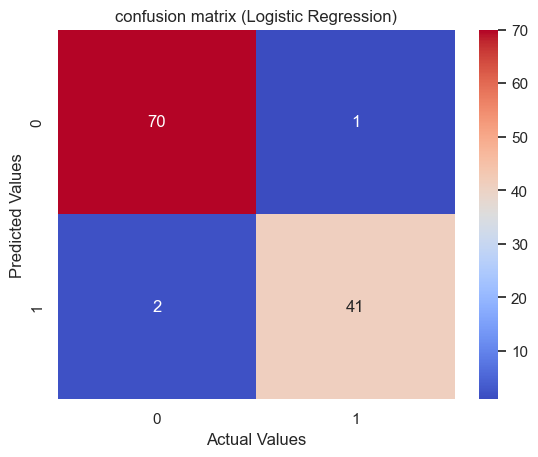

In [13]:
# Visualize confusion matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test,lr_pred),annot= True, cmap = 'coolwarm', fmt='.0f')
plt.title('confusion matrix (Logistic Regression)')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values')
plt.show()

In [14]:
# Visualize Classification report for Logistic Regression
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Summary and Conclusion for Breast Cancer Prediction Dataset

In this project, our objective was to predict breast cancer using a given dataset. The steps involved in the data preprocessing and model training are detailed below:

1. Column Removal:
   - Unnecessary columns were identified and removed from the dataset to simplify the model and focus on the most relevant features.

2. Data Visualization:
   - Comprehensive data visualizations were performed to gain insights into the data. These visualizations helped in understanding the distribution of the data and identifying patterns and relationships between different features and the target variable.

3. Standardization and Label Encoding:
   - Numerical features were standardized to ensure consistent scaling across all features.
   - Categorical features were label-encoded to convert them into a format suitable for the machine learning model.

4. Model Training:
   - A Logistic Regression model was trained on the preprocessed data. Logistic Regression was chosen for its simplicity and effectiveness in binary classification tasks.

5. Model Performance:
   - The trained Logistic Regression model achieved an accuracy of 97.4%. This indicates that the model performs exceptionally well in predicting breast cancer based on the given features.

### Conclusion

This project followed a structured approach to handling the breast cancer prediction dataset. The initial steps involved removing unnecessary columns to simplify the dataset, followed by thorough data visualization to gain insights. Standardization and label encoding ensured the data was prepared effectively for modeling. The Logistic Regression model, known for its simplicity and efficiency in binary classification, proved to be highly effective, achieving an impressive accuracy of 97.4%.

This approach highlights the importance of data preprocessing steps, including column selection, standardization, and label encoding. The successful application of the Logistic Regression model demonstrates its suitability for similar binary classification tasks in medical datasets.
### *Developed by Hosein Mohammadi*
GitHub : https://github.com/Hosein541

Kaggle : https://www.kaggle.com/hoseinnnnnnn 

Gmail : Huseinmohammadi83@gmail.com